# Tutorial Two: Two-way ANOVA

## 实验前的准备
本次实验我们载入一些Python的安装包，如下：

In [1]:
import os
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
from jupyterquiz import display_quiz 
from itertools import product

import statsmodels.api
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

设置数据目录，如下：

In [2]:
os.chdir("/Users/lyuni/ECNU_DaSE/Courses/Stat_ML/Experiment/Data")

## 背景

工程师设计一种用在某装置内的电池。在设计电池时，他可以从三种基片材料中进行选择。在电池的生产和运输过程中，电池会遭遇极端温度。根据经验，温度会影响电池的有效寿命。于是，工程师在设计电池时需要选用在不同温度下都能达到较好电池寿命的基片材料。设计实验时，在三种不同的温度水平（15华氏度、70华氏度和125华氏度）下，工程师选用了三种基片材料所生产的电池。在每种基片材料和温度的组合中，挑选了四枚电池。依据随机次序进行试验，共进行了$3\times 3\times 4 = 36$次试验。

## 数据

数据集Data_2是我们本次所需要使用的数据，具体形式如下所示。

In [3]:
print('Data 2 is shown as follows: \n', pd.read_csv("Data_2.csv"))

Data 2 is shown as follows: 
     Material_Type  Temperature  Life
0               1           15   130
1               1           15    74
2               1           15   155
3               1           15   180
4               1           70    34
5               1           70    80
6               1           70    40
7               1           70    75
8               1          125    20
9               1          125    82
10              1          125    70
11              1          125    58
12              2           15   150
13              2           15   159
14              2           15   188
15              2           15   126
16              2           70   136
17              2           70   106
18              2           70   122
19              2           70   115
20              2          125    25
21              2          125    58
22              2          125    70
23              2          125    45
24              3           15   138
25      

在Data_2这个数据集中共有36次电池试验的基本信息，包括：基片材料、温度设置以及电池寿命。

## 任务

在本次试验中，我们需要解决以下四个问题：
- 判断基片材料类型和温度是否对电池寿命有显著的影响。
- 采用合适的残差图，判断所使用的模型是否恰当。
- 选出一种最合适的基片材料。
- 预估在给定温度时三种材料所生产的电池寿命。

注：本实验中国呢的显著性水平$\alpha=0.05$。

## 解决方案

### 数据预处理

In [4]:
## parameter settings
alpha = 0.05
a = 3
b = 3
m = 4

## load data
Data = pd.read_csv('Data_2.csv')

### Task 1: 判断基片材料类型和温度是否对电池寿命有显著的影响。

我们需要判断基片材料和温度这两个因素是否对电池寿命有影响。这里我们采用双因子方差分析（Two-way ANOVA）模型。假定基片材料为因子$A$，有$a=3$种水平$\alpha_i,i=1,2,a$，而温度为因子$B$，有$b=3$种水平$\beta_j,j=1,2,b$。在因子$A$和$B$的组合中，有$m=4$次重复。
在每个实验中，我们观测到的电池寿命为$y_{ijk},i=1,\cdots,a;j=1,\cdots,b;k=1,\cdots,m$。


双因子方差分析模型为
$$
y_{ijk} = \mu + \alpha_i + \beta_j + (\alpha\beta)_{ij} + \epsilon_{ijk}
$$
其中，$\mu$表示总体均值；$\alpha_i$表示因子A第$i$个水平的主效应且$\sum_{i=1}^a \alpha_i=0$；$\beta_j$表示因子B第$j$个水平的主效应且$\sum_{j=1}^b \beta_j=0$；$(\alpha\beta)_{ij}$表示因子A第$i$个水平和因子B第$j$个水平d的交互效应，且$\sum_{i=1}^a (\alpha\beta)_{ij}=\sum_{j=1}^b (\alpha\beta)_{ij}0$；$\epsilon_{ijk}$表示误差。假定
$$
\epsilon_{ijk} \overset{i.i.d}{\sim} N(0,\sigma^2).
$$

我们将问题转化为以下三组假设检验问题，即
1. 判断电池的基片材料类型对电池的寿命有影响，即
$$
H_0: \alpha_1 = \cdots =\alpha_a = 0 \quad \text{vs} \quad H_1: \alpha_i \neq 0, \exists i
$$
2. 判断温度对电池的寿命有影响，即
$$
H_0: \beta_1 = \cdots =\beta_b = 0 \quad \text{vs} \quad H_1: \beta_j \neq 0, \exists j
$$
3. 判断电池的基片材料类型和温度对电池的寿命有共同的影响，即
$$
H_0: (\alpha\beta)_{11} = \cdots =(\alpha\beta)_{ab} = 0 \quad \text{vs} \quad H_1: (\alpha\beta)_{ij} \neq 0, \exists (i,j)
$$


In [5]:
model = ols('Life ~ C(Material_Type) * C(Temperature)', Data).fit()
#model = ols('Life ~ Material_Type * Temperature', Data).fit()
anova_results = anova_lm(model)
print("Two-way ANOVA Table is shown as follows: \n", round(anova_results,4))

Two-way ANOVA Table is shown as follows: 
                                    df      sum_sq     mean_sq        F  PR(>F)
C(Material_Type)                  2.0  10683.7222   5341.8611   7.9114  0.0020
C(Temperature)                    2.0  39118.7222  19559.3611  28.9677  0.0000
C(Material_Type):C(Temperature)   4.0   9613.7778   2403.4444   3.5595  0.0186
Residual                         27.0  18230.7500    675.2130      NaN     NaN


根据上面的方差分析表，在显著性水平$\alpha=0.05$下，我们发现：
1. 关于两个因子的交互效应，$p = 0.0186 < 0.05$，这表明，电池的基片材料和温度对电池寿命的影响是显著的；
2. 关于因子A的主效应，$p = 0.0020 < 0.05$，这表明，电池的基片材料对电池寿命的影响是显著的；
3. 关于因子B的主效应，$p = 0.0000 < 0.05$，这表明，温度对电池寿命的影响是显著的。

### Task 2：采用合适的残差图，判断所使用的模型是否恰当

在双因子方差分析模型中，仍是三方面的假定：
1. 独立性；
2. 方差齐性；
3. 正态性。

在判断双因子方差分析模型的合理性时，我们需要计算**残差**。

#### 残差分析 0 —— 计算残差

In [6]:
Data_values = Data.values
data_res = Data_values.astype(float)
Data["Fitted_Values"] = model.predict()
Data["Residuals"] = Data["Life"] - model.predict()
print("The residuals are as follows: \n", Data["Residuals"])

The residuals are as follows: 
 0     -4.75
1    -60.75
2     20.25
3     45.25
4    -23.25
5     22.75
6    -17.25
7     17.75
8    -37.50
9     24.50
10    12.50
11     0.50
12    -5.75
13     3.25
14    32.25
15   -29.75
16    16.25
17   -13.75
18     2.25
19    -4.75
20   -24.50
21     8.50
22    20.50
23    -4.50
24    -6.00
25    24.00
26   -34.00
27    16.00
28    28.25
29     4.25
30   -25.75
31    -6.75
32    10.50
33    -3.50
34    18.50
35   -25.50
Name: Residuals, dtype: float64


#### 残差分析 1 —— 残差与不同因子水平的关系图

##### 残差分析 1.1 ： 残差与基片材料的关系

Text(0, 0.5, 'Residuals')

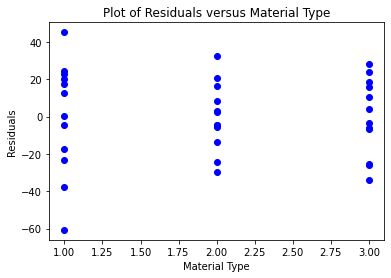

In [7]:
plt.scatter(Data["Material_Type"],Data["Residuals"], c="blue")
plt.title('Plot of Residuals versus Material Type')
plt.xlabel('Material Type')
plt.ylabel('Residuals')

##### 残差分析 1.2 ： 残差与温度的关系

Text(0, 0.5, 'Residuals')

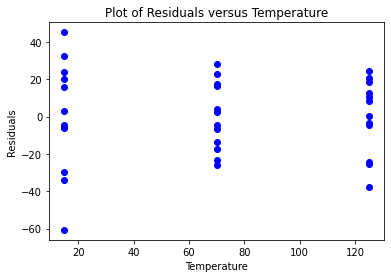

In [8]:
plt.scatter(Data["Temperature"],Data["Residuals"], c="blue")
plt.title('Plot of Residuals versus Temperature')
plt.xlabel('Temperature')
plt.ylabel('Residuals')

##### 残差分析 1.3 ： 残差与拟合值的关系

Text(0, 0.5, 'Residuals')

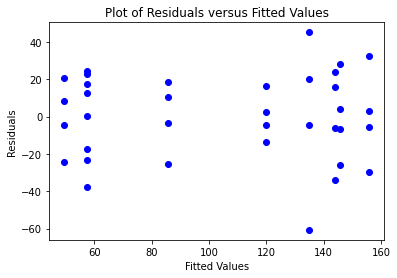

In [9]:
plt.scatter(Data["Fitted_Values"],Data["Residuals"], c="blue")
plt.title('Plot of Residuals versus Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

#### 残差分析2——残差的正态概率图

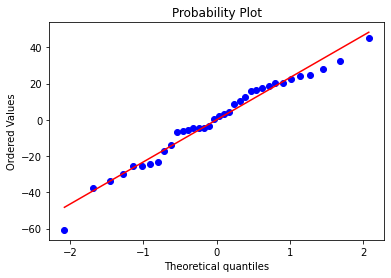

In [10]:
osm, osr = stats.probplot(Data["Residuals"], dist = 'norm', plot = plt)

### Task 3：选出一种最合适的基片材料

In [11]:
print(Data) # Show the data

    Material_Type  Temperature  Life  Fitted_Values  Residuals
0               1           15   130         134.75      -4.75
1               1           15    74         134.75     -60.75
2               1           15   155         134.75      20.25
3               1           15   180         134.75      45.25
4               1           70    34          57.25     -23.25
5               1           70    80          57.25      22.75
6               1           70    40          57.25     -17.25
7               1           70    75          57.25      17.75
8               1          125    20          57.50     -37.50
9               1          125    82          57.50      24.50
10              1          125    70          57.50      12.50
11              1          125    58          57.50       0.50
12              2           15   150         155.75      -5.75
13              2           15   159         155.75       3.25
14              2           15   188         155.75    

In [12]:
Data1 = Data.drop(labels = ["Life","Residuals"],axis = 1)
print(Data1)

    Material_Type  Temperature  Fitted_Values
0               1           15         134.75
1               1           15         134.75
2               1           15         134.75
3               1           15         134.75
4               1           70          57.25
5               1           70          57.25
6               1           70          57.25
7               1           70          57.25
8               1          125          57.50
9               1          125          57.50
10              1          125          57.50
11              1          125          57.50
12              2           15         155.75
13              2           15         155.75
14              2           15         155.75
15              2           15         155.75
16              2           70         119.75
17              2           70         119.75
18              2           70         119.75
19              2           70         119.75
20              2          125    

In [13]:
Data2 = Data1.drop_duplicates(subset = None,keep = "first",inplace = False)
print(Data2)

    Material_Type  Temperature  Fitted_Values
0               1           15         134.75
4               1           70          57.25
8               1          125          57.50
12              2           15         155.75
16              2           70         119.75
20              2          125          49.50
24              3           15         144.00
28              3           70         145.75
32              3          125          85.50


In [14]:
MT = Data["Material_Type"].unique()
print("Material Types are", MT)

Material Types are [1 2 3]


In [15]:
for temp_MT in MT:
    temp_data = Data2[Data2["Material_Type"].isin([temp_MT])]
    exec("Data2_%s = temp_data"%temp_MT)
    
print("Data2_1: \n",Data2_1)
print("Data2_2: \n",Data2_2)
print("Data2_3: \n",Data2_3)

Data2_1: 
    Material_Type  Temperature  Fitted_Values
0              1           15         134.75
4              1           70          57.25
8              1          125          57.50
Data2_2: 
     Material_Type  Temperature  Fitted_Values
12              2           15         155.75
16              2           70         119.75
20              2          125          49.50
Data2_3: 
     Material_Type  Temperature  Fitted_Values
24              3           15         144.00
28              3           70         145.75
32              3          125          85.50


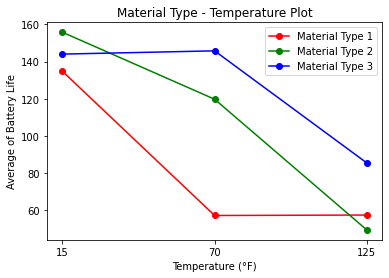

In [16]:
plt.plot(Data2_1["Temperature"],Data2_1["Fitted_Values"], color = 'red', marker = 'o', label = 'Material Type 1')
plt.plot(Data2_2["Temperature"],Data2_2["Fitted_Values"], color = 'green', marker = 'o', label = 'Material Type 2')
plt.plot(Data2_3["Temperature"],Data2_3["Fitted_Values"], color = 'blue', marker = 'o', label = 'Material Type 3')
plt.title("Material Type - Temperature Plot")
plt.xlabel("Temperature (°F)")
plt.ylabel("Average of Battery Life")
plt.xticks([15,70,125],[15,70,125])
plt.legend(['Material Type 1', 'Material Type 2', 'Material Type 3'])


##### 随堂提问

In [17]:
display_quiz("/Users/lyuni/ECNU_DaSE/Courses/Stat_ML/Experiment/Question/T3_Q1.json")

<IPython.core.display.Javascript object>

</details>

<details><summary>Q1【点击提示】</summary>
    
   一般来说，不管是什么基片材料，在低温处的寿命都较长。从低温变化至中等温度时，用材料类型 3 生产的电池的寿命实际上是增加的，而对材料类型 1 与材料类型 2 来说则是减少的。从中等温度变至高温时，用材料类型 2 与类型 3 生产的电池的寿命减少，而由类型 1 生产的电池的寿命不变。因此如果我们希望尽量减少温度变化时电池寿命的损失，材料类型 3 给出了最好的结果。
   
</details>

Q2：在Material Type - Temperature图中，有什么问题？

### Task 4 ：预估在给定温度时三种材料所生产的电池寿命。

这里可以用线性回归模型来拟合数据。

A表示温度的主效应。因为温度是定量的，我们把低、中、高三个水平的温度对应于-1，0，1。同时将线性与二次的温度效应纳入模型的考虑中。

B表示基片材料的类型的主效应。由于材料类型是定性的，我们这里构造两个新的哑变量来代替原本的取值，即

<table>
    <tr>
        <td>  </td>
        <td> 1 </td>  
        <td> 2 </td>
        <td> 3 </td>    
    </tr>
    <tr>
        <td> $B_1$  </td>
        <td> 1 </td>  
        <td> 0 </td>
        <td> -1 </td>    
    </tr>
    <tr>
        <td> $B_2$  </td>
        <td> 0 </td>  
        <td> 1 </td>
        <td> -1 </td>    
    </tr>
</table>


我们构建的模型为
$$
Life = 
\beta_0 
+ \beta_1 A 
+ \beta_2 B_1 
+ \beta_3 B_2 
+ \beta_4 A^2 
+ \beta_5 AB_1 
+ \beta_6 AB_2 
+ \beta_7 A^2B_1
+ \beta_8 A^2B_2
+ \epsilon.
$$

In [18]:
# Derive Variables
A = (Data.values[:,1] - np.mean(Data["Temperature"]))*2 / (np.max(Data["Temperature"]) - np.min(Data["Temperature"])) 
B1 = Data.values[:,0]
B2 = Data.values[:,0]
for i in range(Data.shape[0]):
    if Data["Material_Type"][i] == 1:
        B1[i] = 1
        B2[i] = 0
    if Data["Material_Type"][i] == 2:
        B1[i] = 0
        B2[i] = 1
    if Data["Material_Type"][i] == 3:
        B1[i] = -1
        B2[i] = -1  
AA = A**2
AB1 = A * B1
AB2 = A * B2
AAB1 = AA * B1
AAB2 = AA * B2

Data3 = pd.DataFrame(A,columns=["A"])
Data3["B1"] = B1
Data3["B2"] = B2
Data3["AA"] = AA
Data3["AB1"] = AB1
Data3["AB2"] = AB2
Data3["AAB1"] = AAB1
Data3["AAB2"] = AAB2
Data3["Life"] = Data["Life"]

print(Data3.head())


     A   B1   B2   AA  AB1  AB2  AAB1  AAB2  Life
0 -1.0  1.0  0.0  1.0 -1.0 -0.0   1.0   0.0   130
1 -1.0  1.0  0.0  1.0 -1.0 -0.0   1.0   0.0    74
2 -1.0  1.0  0.0  1.0 -1.0 -0.0   1.0   0.0   155
3 -1.0  1.0  0.0  1.0 -1.0 -0.0   1.0   0.0   180
4  0.0  1.0  0.0  0.0  0.0  0.0   0.0   0.0    34


In [19]:
model_new = ols('Life ~ A+B1+B2+AA+AB1+AB2+AAB1+AAB2', Data3).fit()
model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Life   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     11.00
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           9.43e-07
Time:                        19:32:47   Log-Likelihood:                -163.17
No. Observations:                  36   AIC:                             344.3
Df Residuals:                      27   BIC:                             358.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    107.5833      7.501     14.342      0.000      92.192     122.974
A            -40.3333      5.304     -7.604      0.000     -51.217     -29.450
B1           -50.3333     10.608     -4.745      0.000     -72.100     -28.567
B2            12.1667     10.608      1.147      0.261      -9.600      33.933
AA            -3.0833      9.187     -0.336      0.740     -21.934      15.767
AB1            1.7083      7.501      0.228      0.822     -13.683      17.099
AB2          -12.7917      7.501     -1.705      0.100     -28.183       2.599
AAB1          41.9583     12.992      3.229      0.003      15.300      68.617
AAB2         -14.0417     12.992     -1.081      0.289     -40.700      12.617
==============================================================================
Omnibus:                        1.609   Durbin-Watson:                   2.698
Prob(Omnibus):                  0.447   Jarque-Bera (JB):                1.192
Skew:                          -0.444   Prob(JB):                        0.551
Kurtosis:                       2.922   Cond. No.                         5.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

我们都可以单独输出响应模型的参数，如下：

In [20]:
print("The parameters are ", round(model_new.params,4))

The parameters are  Intercept    107.5833
A            -40.3333
B1           -50.3333
B2            12.1667
AA            -3.0833
AB1            1.7083
AB2          -12.7917
AAB1          41.9583
AAB2         -14.0417
dtype: float64


为预估在给定温度时三种材料所生产的电池寿命，接下来，我们介绍如何构造响应曲线。

In [21]:
## Generate a new dataset
A_new = list(np.linspace(start = -1,stop = 1, num = 100)) # num = 50 (default)
B_new = [1,2,3]
Data4 = pd.DataFrame(index = range(len(A_new)*len(B_new)),columns=["A","B1","B2","AA","AB1","AB2","AAB1","AAB2"])
for i in range(len(A_new)):
    for j in range(len(B_new)):
        Data4["A"][i*len(B_new)+j] = A_new[i]
        if B_new[j] == 1:
            Data4["B1"][i*len(B_new)+j] = 1
            Data4["B2"][i*len(B_new)+j] = 0
        if B_new[j] == 2:
            Data4["B1"][i*len(B_new)+j] = 0
            Data4["B2"][i*len(B_new)+j] = 1
        if B_new[j] == 3:
            Data4["B1"][i*len(B_new)+j] = -1
            Data4["B2"][i*len(B_new)+j] = -1

Data4["AA"] = Data4["A"] **2
Data4["AB1"] = Data4["A"] * Data4["B1"]
Data4["AB2"] = Data4["A"] * Data4["B2"]
Data4["AAB1"] = Data4["AA"] * Data4["B1"]
Data4["AAB2"] = Data4["AA"] * Data4["B2"]  

print(Data4)

            A  B1  B2        AA       AB1       AB2      AAB1      AAB2
0        -1.0   1   0       1.0      -1.0      -0.0       1.0       0.0
1        -1.0   0   1       1.0      -0.0      -1.0       0.0       1.0
2        -1.0  -1  -1       1.0       1.0       1.0      -1.0      -1.0
3   -0.979798   1   0  0.960004 -0.979798      -0.0  0.960004       0.0
4   -0.979798   0   1  0.960004      -0.0 -0.979798       0.0  0.960004
..        ...  ..  ..       ...       ...       ...       ...       ...
295  0.979798   0   1  0.960004       0.0  0.979798       0.0  0.960004
296  0.979798  -1  -1  0.960004 -0.979798 -0.979798 -0.960004 -0.960004
297       1.0   1   0       1.0       1.0       0.0       1.0       0.0
298       1.0   0   1       1.0       0.0       1.0       0.0       1.0
299       1.0  -1  -1       1.0      -1.0      -1.0      -1.0      -1.0

[300 rows x 8 columns]


In [22]:
Data4 = statsmodels.api.add_constant(Data4)
Data4["Fitted_Values"] = np.dot(Data4,model_new.params)
print(Data4.head())

   const         A  B1  B2        AA       AB1       AB2      AAB1      AAB2  \
0    1.0      -1.0   1   0       1.0      -1.0      -0.0       1.0       0.0   
1    1.0      -1.0   0   1       1.0      -0.0      -1.0       0.0       1.0   
2    1.0      -1.0  -1  -1       1.0       1.0       1.0      -1.0      -1.0   
3    1.0 -0.979798   1   0  0.960004 -0.979798      -0.0  0.960004       0.0   
4    1.0 -0.979798   0   1  0.960004      -0.0 -0.979798       0.0  0.960004   

  Fitted_Values  
0        134.75  
1        155.75  
2         144.0  
3    132.414856  
4    155.361698  


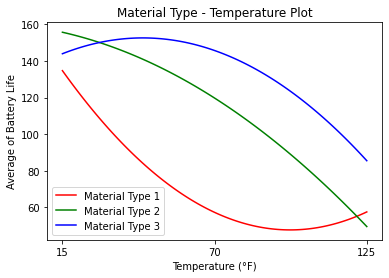

In [23]:
list_B1 = Data4["B1"].unique()
index = 1
for temp in list_B1:
    temp_data = Data4[Data4["B1"].isin([temp])]
    exec("Data4_%s = temp_data"%index)
    index += 1


plt.plot(Data4_1["A"],Data4_1["Fitted_Values"], color = 'red', label = 'Material Type 1')
plt.plot(Data4_2["A"],Data4_2["Fitted_Values"], color = 'green',  label = 'Material Type 2')
plt.plot(Data4_3["A"],Data4_3["Fitted_Values"], color = 'blue',  label = 'Material Type 3')
plt.title("Material Type - Temperature Plot")
plt.xlabel("Temperature (°F)")
plt.ylabel("Average of Battery Life")
plt.xticks([-1,0,1],[15,70,125])
plt.legend(['Material Type 1', 'Material Type 2', 'Material Type 3'])